# Preprocessing Discectomy

In [1]:
# import torch    # 如正常则静默
# a = torch.Tensor([1.])    # 如正常则静默
# a.cuda()    # 如正常则返回"tensor([ 1.], device='cuda:0')"
# from torch.backends import cudnn # 如正常则静默
# cudnn.is_acceptable(a.cuda())    # 如正常则返回 "True"

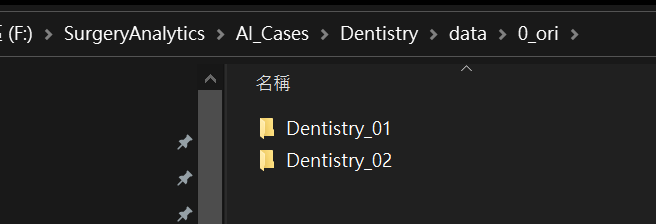# 範例圖
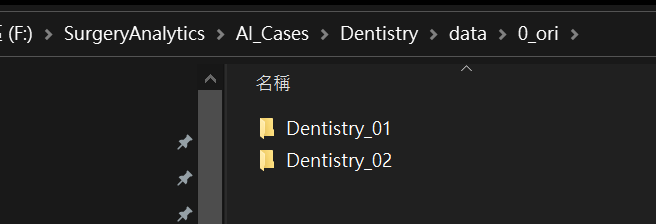


In [2]:
from lib.label_data_trans import TransLabelNum
from lib.detect_label_name import DetectLabelName
from lib.label_report import CreateSummaryExcel
from lib.split_data import SplitData  
from lib.cwdS import Cwd_path  #取得目前檔案的位置
from lib.json_name_path import Jsonname  
#取得json檔案的位置and fullname modify by charley 1120117
import os

# 設定參數

In [3]:
cwd =str(Cwd_path()) #cwd=str(mazda)確保是字串格式
print("cwd : ",cwd)
AI_Path_ori = f"{cwd.split('/')[len(cwd.split('/'))-1]}" # 取得目前資料夾名稱
print('{0} == {1}'.format('AI_Path_ori :',AI_Path_ori))
AI_Path0 = cwd.split(AI_Path_ori)[0] # 取得上層資料夾全部名稱
print('{0} == {1}'.format('AI_Path0 :',AI_Path0))
AI_Path1=AI_Path0[:len(AI_Path0)-1] #長度減一(取得上層資料夾全部名)(去掉斜線)
folder_path=AI_Path1+'/0_Data'
print('{0} == {1}'.format('AI_Path1 :',AI_Path1))
# folder_path=r'F:\SurgeryAnalytics\AI_Cases\Dentistry\1_Linknet_efficientnetb7_0_3\0_Data'
label_folder_path = folder_path+"/0_ori" # 原始標記檔案資料夾的根目錄
trans_folder_path = folder_path+"/1_trans"# 轉換標記資料檔案資料夾的根目錄
split_folder_path = folder_path+"/2_split"# 切分轉換標記資料檔案資料夾的根目錄

for folder in [label_folder_path, trans_folder_path, split_folder_path]:
    if not os.path.isdir(folder):
        os.mkdir(folder)
   
  
surgeryName = "Dentistry"  #輸出報告用通常=專案名 Discectomy=骨科 Dentistry=牙科

AI_Data_jsonFile = Jsonname() #1120118

def readJSONFile(jsonFilePath):
    try:
        with open(jsonFilePath, "r") as f:
            text = f.read()
    except IOError as er:
        print("Error: Json file load failed or Can not find the file path '{}'".format(er.filename))
    # jsonFile: Key-id, Value-class. The class might duplicate.
    jsonFile = json.loads(text)
    return jsonFile


cwd :  /media/ai/disk1/notebook/jupyter_work/test1/SurgeryAnalytics/AI_Cases/Dentistry_AI_ZERO_New_1120808_500_linknet/A_Data_preprocessing
AI_Path_ori : == A_Data_preprocessing
AI_Path0 : == /media/ai/disk1/notebook/jupyter_work/test1/SurgeryAnalytics/AI_Cases/Dentistry_AI_ZERO_New_1120808_500_linknet/
AI_Path1 : == /media/ai/disk1/notebook/jupyter_work/test1/SurgeryAnalytics/AI_Cases/Dentistry_AI_ZERO_New_1120808_500_linknet
AI_Data_jsonFile : == /media/ai/disk1/notebook/jupyter_work/test1/SurgeryAnalytics/AI_Cases/Dentistry_AI_ZERO_New_1120808_500_linknet/Dentistry_AI_ZERO_New_1120808_500_linknet_config.json


In [4]:
excel_name=cwd+'/'+surgeryName+'.xlsx'
print(excel_name)

/media/ai/disk1/notebook/jupyter_work/test1/SurgeryAnalytics/AI_Cases/Dentistry_AI_ZERO_New_1120808_500_linknet/A_Data_preprocessing/Dentistry.xlsx


In [5]:
# tool_list = [  
#                 'Bipolar_radio_frequency',
#                 'Bone_curettes',
#                 'Burr',
#                 'Hook_probe',
#                 'Kerrison_punch',
#                 'Probe',
#                 'Rongeur',
#                 'Scalpel',
# ]

In [6]:
# #＃轉換手術刀
# import json
# import tqdm 
# import os
# for dirPath, dirNames, fileNames in (os.walk("00_data")):
#     for f in fileNames:
#         if "json" in f:
#             save=False
#             jsonFilePath = os.path.join(dirPath, f)
#             jsonFile =readJSONFile(jsonFilePath)
#             for k,v in jsonFile.items():
#                 if v in tool_list:
#                     jsonFile[k] = "Surgery_tool"
#                     save = True
#             if save == True:
#                 with open(jsonFilePath, 'w') as f:
#                     json.dump(jsonFile, f)

In [7]:
# ## 只取椎間盤 脊神經
# import json
# from tqdm import tqdm 
# import shutil
# import os
# fileList = []
# for dirPath, dirNames, fileNames in tqdm(list(os.walk("00_data"))):
#     for f in fileNames:
#         if "json" in f:
#             save=False
#             jsonFilePath = os.path.join(dirPath, f)
#             jsonFile =readJSONFile(jsonFilePath)
#             if "Intervertebral_disc" not in list(jsonFile.values()):# and "Spinal_nerve" not in list(jsonFile.values()):
#                 # if v == "Intervertebral_disc" or v == "Spinal_nerve":
#                 npyFile = jsonFilePath.replace("json","npy")
#                 imgFile = jsonFilePath.replace("json","png")
#                 # print(jsonFilePath,npyFile)
#                 if os.path.isfile(jsonFilePath):
#                     os.remove(jsonFilePath)
#                 if os.path.isfile(imgFile):
#                     os.remove(imgFile)
#                 if os.path.isfile(npyFile):
#                     os.remove(npyFile)
                    
#             # if save == True:
#             #     with open(jsonFilePath, 'w') as f:
#             #         json.dump(jsonFile, f)

In [8]:
# import os
# surgeryName = "Discectomy"
# # label_folder_path = '/ubuntu/data/SurgeryAnalytics/AI_Cases/Discectomy/preprocessing/First_analytics/00_data' # 原始標記檔案資料夾的根目錄
# # trans_folder_path = '/ubuntu/data/SurgeryAnalytics/AI_Cases/Discectomy/preprocessing/First_analytics/01_trans' # 轉換標記資料檔案資料夾的根目錄
# # split_folder_path = '/ubuntu/data/SurgeryAnalytics/AI_Cases/Discectomy/preprocessing/First_analytics/02_split'# 切分轉換標記資料檔案資料夾的根目錄
# label_folder_path = '/ubuntu/data/SurgeryAnalytics/AI_Cases/Discectomy/data/00_data' # 原始標記檔案資料夾的根目錄
# trans_folder_path = '/ubuntu/data/SurgeryAnalytics/AI_Cases/Discectomy/data/01_trans' # 轉換標記資料檔案資料夾的根目錄
# split_folder_path = '/ubuntu/data/SurgeryAnalytics/AI_Cases/Discectomy/data/02_split'# 切分轉換標記資料檔案資料夾的根目錄
# for folder in [label_folder_path, trans_folder_path, split_folder_path]:
#     if not os.path.isdir(folder):
#         os.mkdir(folder)

correct_label = ['Alveolar_bone',
'Caries',
'Crown',
'Dentin', 
'Enamel',
'Implant',
'Mandibular_alveolar_nerve', 
'Maxillary_sinus', 
'Periapical_lesion', 
'Post_and_core', 
'Pulp', 
'Restoration', 
'Root_canal_filling'
                   ]
# correct_label = ['Adipose_tissue',
#                  'Articular_capsule',
#                  'Bipolar_radio_frequency',
#                  'Bleeding_point',
#                  'Bone_curettes',
#                  'Burr',
#                  'Drainage_tube',
#                  'Foreign_material',
#                  'Hook_probe',
#                  'Intervertebral_disc',
#                  'Intervertebral_disc_after_injection',
#                  'Kerrison_punch',
#                  'Lamina',
#                  'Ligamentum_flava',
#                  'Needle',
#                  'Organ_tissue',
#                  'Probe',
#                  'Proforma',
#                  'Rongeur',
#                  'Scalpel',
#                  'Spinal_nerve',
#                  'Surgery_tool',
#                  'Suspected_Spinal_nerve',
#                  'Suspected_intervertebral_disc'
#                 ]
                # 轉換的標記類別清單(不含背景), 資料格式可為list(自動以流水號轉換)或dict(指定轉換數值), 可配合DetectLabelName函式
test_folder_list=["Dentistry_0002"] # 哪些資料夾的標記資料要當作testing dataset, 以字串格式輸入至list中
val_folder_list=[] # 哪些資料夾的標記資料要當作validation data, 以字串格式輸入至list中
label_type='Mask' # 轉換的標記資料格式(Mask or Npy)
image_type="png" # 圖片格式(jpg, png, tif...)
random_choice=True # 除掉test_folder_list及val_folder_list後, 剩餘的資料夾是否要隨機挑選validation data(10%)
use_for_TFRecord=False # 是否要儲存為TFRecord格式(不建議)
# excel_report_save_path = r'F:\SurgeryAnalytics\AI_Cases\Discectomy\preprocessing\First_analytics\Summary.xlsx' # 標記資料統計報表儲存路徑, 副檔名.xlsx
excel_name=cwd+'/'+surgeryName+'.xlsx'
excel_report_save_path = excel_name # 標記資料統計報表儲存路徑, 副檔名.xlsx
detect_label_list = correct_label

In [9]:
# label_folder_path = label_folder_path.replace("F:","/nas").replace("/","/")
# trans_folder_path = trans_folder_path.replace("F:","/nas").replace("/","/")
# split_folder_path = split_folder_path.replace("F:","/nas").replace("/","/")
# excel_report_save_path = excel_report_save_path.replace("F:","/nas").replace("/","/")

# 檢測標籤名稱  這區暫時沒啥用處


In [10]:
# DetectLabelName(label_folder_path)
label_name_FOR_file = DetectLabelName(label_folder_path).get_list()

Update appear label: 
 {'Restoration', 'Alveolar_bone', 'Background', 'Pulp', 'Dentin', 'Enamel', 'Caries'} 

Update appear label: 
 {'Restoration', 'Alveolar_bone', 'Background', 'Pulp', 'Dentin', 'Enamel', 'Crown', 'Caries'} 

Update appear label: 
 {'Restoration', 'Alveolar_bone', 'Pulp', 'Post_and_core', 'Caries', 'Root_canal_filling', 'Background', 'Maxillary_sinus', 'Dentin', 'Enamel', 'Crown'} 

Update appear label: 
 {'Restoration', 'Alveolar_bone', 'Pulp', 'Post_and_core', 'Caries', 'Root_canal_filling', 'Background', 'Maxillary_sinus', 'Dentin', 'Enamel', 'Periapical_lesion', 'Crown'} 

Update appear label: 
 {'Restoration', 'Alveolar_bone', 'Pulp', 'Implant', 'Post_and_core', 'Caries', 'Root_canal_filling', 'Background', 'Maxillary_sinus', 'Dentin', 'Enamel', 'Periapical_lesion', 'Crown'} 

Update appear label: 
 {'Restoration', 'Alveolar_bone', 'Pulp', 'Implant', 'Post_and_core', 'Caries', 'Root_canal_filling', 'Mandibular_alveolar_nerve', 'Background', 'Maxillary_sinus', '

In [11]:
label_name = {'Alveolar_bone','Caries','Crown','Dentin', 'Enamel','Implant','Mandibular_alveolar_nerve', 'Maxillary_sinus', 'Periapical_lesion', 'Post_and_core', 'Pulp', 'Restoration', 'Root_canal_filling'} 
num_classes = len(list(label_name)) + 1

In [12]:
label_sort_name = list(label_name)
label_sort_name.sort()
label_sort_name

['Alveolar_bone',
 'Caries',
 'Crown',
 'Dentin',
 'Enamel',
 'Implant',
 'Mandibular_alveolar_nerve',
 'Maxillary_sinus',
 'Periapical_lesion',
 'Post_and_core',
 'Pulp',
 'Restoration',
 'Root_canal_filling']

In [13]:
if "Background" in label_sort_name:
    label_sort_name.remove('Background')

# 資料轉換

In [14]:
# Set correct_label
# correct_label = label_sort_name    # 這行主要在設定要訓練的標籤名

In [15]:
correct_label    #由於我們強制指定只訓練13種

# test_folder_list=["Dentistry_0002"] # 哪些資料夾的標記資料要當作testing dataset, 以字串格式輸入至list中
# val_folder_list=[] # 哪些資料夾的標記資料要當作validation data, 以字串格式輸入至list中
# label_type='Mask' # 轉換的標記資料格式(Mask or Npy)
# image_type='png'  # 圖片格式(jpg, png, tif...)
# random_choice=True # 除掉test_folder_list及val_folder_list後, 剩餘的資料夾是否要隨機挑選validation data(10%)
# use_for_TFRecord=False # 是否要儲存為TFRecord格式(不建議)
# excel_report_save_path = "Dentistry_ClassInformation.xlsx"#r'' # 標記資料統計報表儲存路徑, 副檔名.xlsx
# detect_label_list = correct_label # 建立統計報表時要統計的類別清單, 通常與correct_label的list格式內容一致

['Alveolar_bone',
 'Caries',
 'Crown',
 'Dentin',
 'Enamel',
 'Implant',
 'Mandibular_alveolar_nerve',
 'Maxillary_sinus',
 'Periapical_lesion',
 'Post_and_core',
 'Pulp',
 'Restoration',
 'Root_canal_filling']

In [16]:
TransLabelNum(label_folder_path, trans_folder_path, correct_label,imageType = image_type, saveType=label_type)

Transform Label Dictionary:
Alveolar_bone: 1
Caries: 2
Crown: 3
Dentin: 4
Enamel: 5
Implant: 6
Mandibular_alveolar_nerve: 7
Maxillary_sinus: 8
Periapical_lesion: 9
Post_and_core: 10
Pulp: 11
Restoration: 12
Root_canal_filling: 13
----------------------------------------

/media/ai/disk1/notebook/jupyter_work/test1/SurgeryAnalytics/AI_Cases/Dentistry_AI_ZERO_New_1120808_500_linknet/0_Data/0_ori/Dentistry_0001/.ipynb_checkpoints.json
Transform folder_Dentistry_0001 cost 85.81 sec. 

/media/ai/disk1/notebook/jupyter_work/test1/SurgeryAnalytics/AI_Cases/Dentistry_AI_ZERO_New_1120808_500_linknet/0_Data/0_ori/Dentistry_0002/.ipynb_checkpoints.json
Transform folder_Dentistry_0002 cost 416.98 sec. 



# 建立標記報表

In [17]:
# # import os
# def closeFile():
#     try:
#         os.system('TASKKILL /F /IM excel.exe')
#     except Exception:
#         print("KU")

# closeFile() #如果有開啟先刪除Excel

In [18]:
CreateSummaryExcel(label_folder_path, excel_report_save_path, detect_label_list)

Summary Dentistry_0002 cost 0.73 sec
Summary Dentistry_0001 cost 0.14 sec
['Summary', 'Sheet', 'Dentistry_0002', 'Dentistry_0001']
['Summary', 'Dentistry_0002', 'Dentistry_0001']


# 資料分割

In [19]:
SplitData(trans_folder_path, split_folder_path, test_folder_list, val_folder_list, label_type, random_choice, use_for_TFRecord)

Split testing set...
Split folder Dentistry_0002 ssuccessfully!


Random split training and validation set...
Split folder Dentistry_0001 ssuccessfully!


In [20]:
# import json
# config = {"surgeryName":surgeryName\
#          ,"label_folder_path": label_folder_path, "trans_folder_path": trans_folder_path,"split_folder_path": split_folder_path, "correct_label": list(correct_label)\
#          }
#          #,"test_folder_list": test_folder_list}#, "val_folder_list": val_folder_list\
#         # ,"excel_report_save_path": excel_report_save_path}
# jsonFile = surgeryName + "_config.json"
# jsonFile = os.getcwd() + "/" + jsonFile
# with open(jsonFile, 'w') as f:
#     json.dump(config, f)    

In [21]:
import json
config = {"surgeryName": surgeryName,
          "label_folder_path": label_folder_path, 
          "trans_folder_path": trans_folder_path,
          "split_folder_path": split_folder_path,
          "correct_label": correct_label,
          "detect_label_list": detect_label_list,
          "Data_total_excel":excel_report_save_path,
          "test_folder_list":test_folder_list}

# config = {"surgeryName": surgeryName, 
#           "label_folder_path": label_folder_path, 
#           "trans_folder_path": trans_folder_path,
#           "split_folder_path": split_folder_path, 
#           "correct_label": correct_label,
#           "detect_label_list": detect_label_list,
#           "test_folder_list":test_folder_list}


# jsonFile = f"{cwd}/{surgeryName}_config.json"
# print(jsonFile)   #注意等等跑AI需要過來複製一下路徑
# with open(jsonFile, 'w') as f:
#     json.dump(config, f)
# config

In [22]:
User_name=u'沈易達'

In [23]:
# import json
# label_folder_path = label_folder_path.replace("F:","/nas").replace("/","/")
# trans_folder_path = trans_folder_path.replace("F:","/nas").replace("/","/")
# split_folder_path = split_folder_path.replace("F:","/nas").replace("/","/")
# excel_report_save_path = excel_report_save_path.replace("F:","/nas").replace("/","/")
# config = {
#           "surgeryName":surgeryName\
#          ,"label_folder_path": label_folder_path, "trans_folder_path": trans_folder_path,"split_folder_path": split_folder_path, "correct_label": list(correct_label)\
#          ,"num_classes":num_classes
#         }
#          #,"test_folder_list": test_folder_list}#, "val_folder_list": val_folder_list\
#          #,"excel_report_save_path": excel_report_save_path}
# jsonFile = surgeryName + "_config_Ubuntu.json"
# with open(jsonFile, 'w') as f:
#     json.dump(config, f)

In [24]:
# AI_Data_jsonFile = f"{cwd}/{surgeryName}_config.json"
AI_Data_jsonFile = Jsonname()
print(AI_Data_jsonFile )   #注意等等跑AI需要過來複製一下路徑
with open(AI_Data_jsonFile , 'w') as f:
    json.dump(config, f)
config

AI_Data_jsonFile : == /media/ai/disk1/notebook/jupyter_work/test1/SurgeryAnalytics/AI_Cases/Dentistry_AI_ZERO_New_1120808_500_linknet/Dentistry_AI_ZERO_New_1120808_500_linknet_config.json
/media/ai/disk1/notebook/jupyter_work/test1/SurgeryAnalytics/AI_Cases/Dentistry_AI_ZERO_New_1120808_500_linknet/Dentistry_AI_ZERO_New_1120808_500_linknet_config.json


{'surgeryName': 'Dentistry',
 'label_folder_path': '/media/ai/disk1/notebook/jupyter_work/test1/SurgeryAnalytics/AI_Cases/Dentistry_AI_ZERO_New_1120808_500_linknet/0_Data/0_ori',
 'trans_folder_path': '/media/ai/disk1/notebook/jupyter_work/test1/SurgeryAnalytics/AI_Cases/Dentistry_AI_ZERO_New_1120808_500_linknet/0_Data/1_trans',
 'split_folder_path': '/media/ai/disk1/notebook/jupyter_work/test1/SurgeryAnalytics/AI_Cases/Dentistry_AI_ZERO_New_1120808_500_linknet/0_Data/2_split',
 'correct_label': ['Alveolar_bone',
  'Caries',
  'Crown',
  'Dentin',
  'Enamel',
  'Implant',
  'Mandibular_alveolar_nerve',
  'Maxillary_sinus',
  'Periapical_lesion',
  'Post_and_core',
  'Pulp',
  'Restoration',
  'Root_canal_filling'],
 'detect_label_list': ['Alveolar_bone',
  'Caries',
  'Crown',
  'Dentin',
  'Enamel',
  'Implant',
  'Mandibular_alveolar_nerve',
  'Maxillary_sinus',
  'Periapical_lesion',
  'Post_and_core',
  'Pulp',
  'Restoration',
  'Root_canal_filling'],
 'Data_total_excel': '/media/